# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Import Data

In [2]:
# TO DO: Change path to your file

path = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2020-01/2020-01-metropolitan-outcomes.csv'

df = pd.read_csv(path)
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,e93743f00c254ff3d1e574d712e0334c75371b5b0bd701...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.162073,51.399293,On or near MADEIRA ROAD,E01003375,Merton 022B,Suspect charged
1,2fb83a958aa677252a50290155feb5bd6fc0dd3e96a3bc...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.162884,51.406680,On or near Parking Area,E01003388,Merton 013B,Offender given a caution
2,37cc87e4ed05345f313c0014f8902c2012d89673c13ede...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.239671,51.536702,On or near CARDINAL HINSLEY CLOSE,E01000535,Brent 031F,Local resolution
3,b6dcdcaab0fa56b3de69c02b7646b70d5dcb0d8ab0e97e...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.238919,51.546106,On or near UNITY CLOSE,E01000643,Brent 024D,Suspect charged
4,b46ff537789f301b0ef5ca4ab052d4da1d2c45d8b19940...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.085346,51.530700,On or near WHEELERS CROSS,E01000049,Barking and Dagenham 021C,Local resolution


In [3]:
#filter out items with longitude/latitude is NaN

df = df[df['Longitude'].isnull() == False]
df = df[df['Latitude'].isnull() == False]

#These values are outliers for the metropolitan data 

df = df[(df['Latitude'] < 51.75) == True]
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,e93743f00c254ff3d1e574d712e0334c75371b5b0bd701...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.162073,51.399293,On or near MADEIRA ROAD,E01003375,Merton 022B,Suspect charged
1,2fb83a958aa677252a50290155feb5bd6fc0dd3e96a3bc...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.162884,51.406680,On or near Parking Area,E01003388,Merton 013B,Offender given a caution
2,37cc87e4ed05345f313c0014f8902c2012d89673c13ede...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.239671,51.536702,On or near CARDINAL HINSLEY CLOSE,E01000535,Brent 031F,Local resolution
3,b6dcdcaab0fa56b3de69c02b7646b70d5dcb0d8ab0e97e...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.238919,51.546106,On or near UNITY CLOSE,E01000643,Brent 024D,Suspect charged
4,b46ff537789f301b0ef5ca4ab052d4da1d2c45d8b19940...,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.085346,51.530700,On or near WHEELERS CROSS,E01000049,Barking and Dagenham 021C,Local resolution


In [42]:
#Create an array with longitude, latitude data

data = df.loc[:, ['Longitude', 'Latitude']]
X = data.values

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

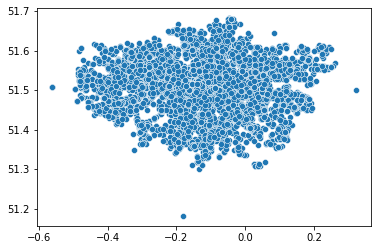

In [5]:
#Plot the data

sns.scatterplot(X[:,0], X[:,1])

# Clustering Algorithm

In [5]:
def calculate_distance(X, centroids, cluster):
     
    ''' 
    This function calculates the Cluster Sum of Squares. This is the squared average 
    of distance of all the points within a cluster to the cluster centroid
    '''

    sum = 0

    for i, val in enumerate(X): 
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    
    return sum

In [32]:
def kmeans(X, k):
    ''' 
    Kmeans cluster algorithm that optimizes for smallest distance from centroid to points
    '''
    
    diff = 1

    cluster = np.zeros(X.shape[0])

    centroids = data.sample(n=k).values

    while diff:
     # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
        # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [36]:
# This is optional and not really applicable in our case but here we can see what effect a new cluster has on the distance within the clusters
distance_list = []
for k in range(65, 75):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_distance(X, centroids, cluster)
    distance_list.append(cost)

ValueError: operands could not be broadcast together with shapes (68,2) (67,2) 

In [35]:
sns.lineplot(x = range(65,75), y=distance_list, marker ='o')
plt.show()

NameError: name 'distance_list' is not defined

In [51]:
# Choose k and perform algorithm

k = 20
centroids, cluster = kmeans(X, k)

ValueError: operands could not be broadcast together with shapes (100,2) (97,2) 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


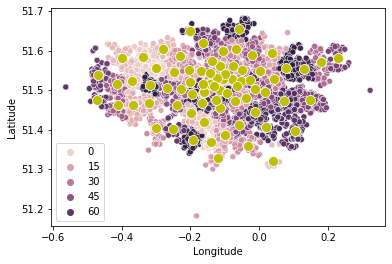

In [34]:
#Plot the data with the clusters

clustering_plot = sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [37]:
amount_crimes = {}
for item in cluster: 
    if item not in amount_crimes: 
        amount_crimes[item] = 1
    else: 
        amount_crimes[item] += 1 

print(min(amount_crimes.values()))


40


In [39]:
print(max(amount_crimes.values()))

420


# Plotly

In [17]:
import plotly.express as px

In [18]:
fig = px.scatter_geo(lat = X[:, 1], lon = X[:, 0], color = cluster)
fig.show()


In [19]:
#Uncomment if you want to save the figure:
#fig = clustering_plot.get_figure()
#fig.savefig('Kmeans_Clustering.png')

In [20]:
path_2013 = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2013-01/2013-01-metropolitan-outcomes.csv'
path_2014 = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2014-01/2014-01-metropolitan-outcomes.csv'
path_2015 = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2015-01/2015-01-metropolitan-outcomes.csv'
path_2016 = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2016-01/2016-01-metropolitan-outcomes.csv'
path_2017 = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2017-01/2017-01-metropolitan-outcomes.csv'
path_2018 = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2018-01/2018-01-metropolitan-outcomes.csv'
path_2019 = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2019-01/2019-01-metropolitan-outcomes.csv'

df = pd.read_csv(path_2013)
df.append(pd.read_csv(path_2014))
df.append(pd.read_csv(path_2015))
df.append(pd.read_csv(path_2016))
df.append(pd.read_csv(path_2017))
df.append(pd.read_csv(path_2018))
df.append(pd.read_csv(path_2019))



/var/folders/ph/6xj4s_7j2hdblj9jts4mbpvc0000gn/T/ipykernel_69559/1621169038.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ph/6xj4s_7j2hdblj9jts4mbpvc0000gn/T/ipykernel_69559/1621169038.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ph/6xj4s_7j2hdblj9jts4mbpvc0000gn/T/ipykernel_69559/1621169038.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ph/6xj4s_7j2hdblj9jts4mbpvc0000gn/T/ipykernel_69559/1621169038.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/ph/6xj4s_7j2hdblj9jts4mbpvc0000gn/T/ipykernel_69559/1621169038.py:14: FutureWarning:

The frame.append method is de

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Hammersmith and Fulham 012D,Offender given a drugs possession warning
1,750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.203552,51.491597,On or near Shopping Area,E01001870,Hammersmith and Fulham 012D,Investigation complete; no suspect identified
2,21938f414ed8b80c3a02b659832702736a595a541d5574...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Hammersmith and Fulham 012E,Investigation complete; no suspect identified
3,38a2922207338b6ff65203c3c292371402925a9651e2ea...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.212671,51.493427,On or near AURIOL ROAD,E01001871,Hammersmith and Fulham 012E,Suspect charged
4,f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Hammersmith and Fulham 012E,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...
53743,18d1397536682714f43212c0bf605c6f4005fbee5904f6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.191553,51.466836,On or near DYMOCK STREET,E01001938,Hammersmith and Fulham 025D,Defendant found not guilty
53744,46509f74f439ad5342814fec379ddb4ca73e6bce6c627d...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.276796,51.615432,On or near HERONSGATE,E01000192,Barnet 018A,Offender otherwise dealt with
53745,13328562852ba9a3364ff3910fd19e8270f7ae8ce2f9e2...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.397150,51.531972,On or near HUGHENDEN GARDENS,E01002393,Hillingdon 020B,Defendant found not guilty
53746,3fe1effe852d5ea910cdd8615678cb1ce9048d37a02133...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.065809,51.526995,On or near FLORIDA STREET,E01004313,Tower Hamlets 009B,Defendant found not guilty


In [21]:
#filter out items with longitude/latitude is NaN

df = df[df['Longitude'].isnull() == False]
df = df[df['Latitude'].isnull() == False]

#This dataset had some outliers, I deleted them out of convenience

df = df[(df['Latitude'] < 51.75) == True]
df = df[(df['Latitude'] > 51.2) == True]
df = df[(df['Longitude'] > -0.6) == True]
df = df[(df['Longitude'] < 0.4) == True]
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,a844d2986672f8e7141424e629e3b45dcccae1143bdded...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.207076,51.492838,On or near NORTH END CRESCENT,E01001870,Hammersmith and Fulham 012D,Offender given a drugs possession warning
1,750a65e3f0c580fb801c6589ae8fa8ca9ee3b92022de33...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.203552,51.491597,On or near Shopping Area,E01001870,Hammersmith and Fulham 012D,Investigation complete; no suspect identified
2,21938f414ed8b80c3a02b659832702736a595a541d5574...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Hammersmith and Fulham 012E,Investigation complete; no suspect identified
3,38a2922207338b6ff65203c3c292371402925a9651e2ea...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.212671,51.493427,On or near AURIOL ROAD,E01001871,Hammersmith and Fulham 012E,Suspect charged
4,f371041d2c50c8a37c96dbdb736c77a9649d2770b35c1e...,2013-01,Metropolitan Police Service,Metropolitan Police Service,-0.213284,51.491764,On or near GLIDDON ROAD,E01001871,Hammersmith and Fulham 012E,Investigation complete; no suspect identified


In [22]:
data = df.loc[:, ['Longitude', 'Latitude']]
X = data.values

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

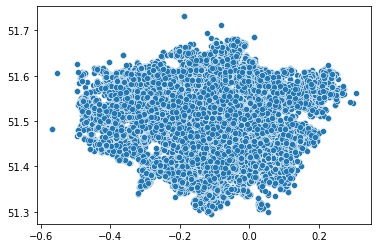

In [23]:
sns.scatterplot(X[:,0], X[:,1])

In [24]:
distance_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_distance(X, centroids, cluster)
    distance_list.append(cost)

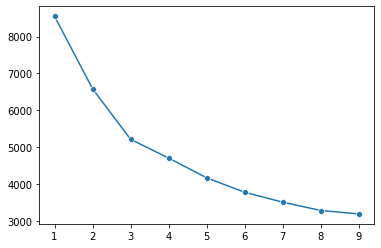

In [25]:
sns.lineplot(x = range(1,10), y=distance_list, marker ='o')
plt.show()

In [26]:
# Choose k and perform algorithm

k = 20
centroids, cluster = kmeans(X, k)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



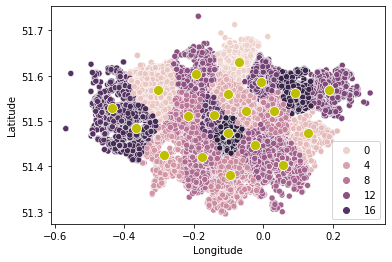

In [27]:
clustering_plot = sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [28]:
print(centroids)

[[-7.04178700e-02  5.16307625e+01]
 [-3.02505362e-01  5.15675517e+01]
 [ 1.29010763e-01  5.14726299e+01]
 [-1.02383260e-01  5.15591450e+01]
 [-4.95629286e-02  5.15211062e+01]
 [-2.84704335e-01  5.14245102e+01]
 [-9.44077520e-02  5.13815720e+01]
 [ 3.10124765e-02  5.15231432e+01]
 [-2.15710903e-01  5.15109561e+01]
 [-1.77358844e-01  5.14212227e+01]
 [ 5.64864581e-02  5.14037242e+01]
 [-2.35303844e-02  5.14477245e+01]
 [-1.92981088e-01  5.16028638e+01]
 [ 1.87992816e-01  5.15685439e+01]
 [-7.52835559e-03  5.15867848e+01]
 [-1.42512902e-01  5.15143592e+01]
 [-4.36001216e-01  5.15282911e+01]
 [-3.65899000e-01  5.14847176e+01]
 [ 9.02014900e-02  5.15612532e+01]
 [-1.00202116e-01  5.14742073e+01]]


In [29]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [30]:
print(train_centroids)

[[ 1.75898859e-01  5.15670636e+01]
 [-3.71176986e-01  5.14855186e+01]
 [ 1.39481847e-02  5.14060849e+01]
 [-7.08919422e-02  5.14980246e+01]
 [-2.07806062e-01  5.14994238e+01]
 [-3.33906451e-01  5.15766185e+01]
 [-3.21881754e-03  5.15565714e+01]
 [-2.91537590e-01  5.14121741e+01]
 [-7.98151297e-03  5.14836803e+01]
 [-2.69743006e-01  5.15313468e+01]
 [-2.05893179e-01  5.15975032e+01]
 [ 7.07154479e-02  5.15381146e+01]
 [-9.32715950e-02  5.13851261e+01]
 [-8.59002835e-02  5.15445340e+01]
 [-1.81836180e-01  5.13939511e+01]
 [-4.55803584e-01  5.15106128e+01]
 [-1.32335730e-01  5.14620913e+01]
 [ 1.24939528e-01  5.14534757e+01]
 [-1.38971461e-01  5.15203343e+01]
 [-7.20263073e-02  5.16158023e+01]]


In [31]:
print(centroids)

[[-7.04178700e-02  5.16307625e+01]
 [-3.02505362e-01  5.15675517e+01]
 [ 1.29010763e-01  5.14726299e+01]
 [-1.02383260e-01  5.15591450e+01]
 [-4.95629286e-02  5.15211062e+01]
 [-2.84704335e-01  5.14245102e+01]
 [-9.44077520e-02  5.13815720e+01]
 [ 3.10124765e-02  5.15231432e+01]
 [-2.15710903e-01  5.15109561e+01]
 [-1.77358844e-01  5.14212227e+01]
 [ 5.64864581e-02  5.14037242e+01]
 [-2.35303844e-02  5.14477245e+01]
 [-1.92981088e-01  5.16028638e+01]
 [ 1.87992816e-01  5.15685439e+01]
 [-7.52835559e-03  5.15867848e+01]
 [-1.42512902e-01  5.15143592e+01]
 [-4.36001216e-01  5.15282911e+01]
 [-3.65899000e-01  5.14847176e+01]
 [ 9.02014900e-02  5.15612532e+01]
 [-1.00202116e-01  5.14742073e+01]]


In [32]:
x = 0 
distances = []
final_distances = []
for item in train_centroids: 
    lon1 = item[0]
    lat1 = item[1]
    for item in centroids: 
        lon2 = item[0]
        lat2 = item[1]
        distances.append(haversine(lon1, lat1, lon2, lat2))
    final_distances.append(min(distances))
    distances = []
final_distances



[0.8519549898670328,
 0.3761628547327683,
 2.9623121913761015,
 2.9607476549450924,
 1.3941627093028601,
 2.392911183982294,
 3.3727487487176613,
 1.451252217695211,
 4.140654433176839,
 4.372235326091164,
 1.0726758451904417,
 2.9043417327606136,
 0.40298116474882784,
 1.9845309961414048,
 3.0483183007860863,
 2.396133805436083,
 2.6018251787220468,
 2.148434727504851,
 0.708153363622476,
 1.6671945129612185]

In [34]:
total_distance = haversine(-0.6, 51.3, 0.3, 51.7)
total_distance

76.54569830516543